In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stock_returns = pd.read_csv("../../Data/StockReturns.csv")

esg_scores = np.array([
    36.6, 17.9, 18, 
    18, 23.2, 29.2, 
    15.7, 25.4, 25.6, # Del this
    19.8, 13.8, 18.1, 
    17.3, 14, 12.3, 
    21.2, 26.8, 24.9
])

# Defining stock pool
ticker_df =  pd.DataFrame({
    "Petroleum": ["EQNR.OL", "SUBC.OL", "BWO.OL"],
    "Food": ["ORK.OL", "MOWI.OL", "LSG.OL"],
    "Materials": ["NHY.OL", "YAR.OL", "RECSI.OL"],
    "Technologies": ["TEL.OL", "NOD.OL", "ATEA.OL"],
    "Financial": ["STB.OL", "DNB.OL", "AKER.OL"],
    "Shipping":["SNI.OL", "BELCO.OL", "ODF.OL"]
})

stock_cols = stock_returns.columns

train = stock_returns.iloc[:int(len(stock_returns)*0.9)]
valid = stock_returns.iloc[int(len(stock_returns)*0.8):int(len(stock_returns)*0.9)]
test = stock_returns.iloc[int(len(stock_returns)*0.9):]

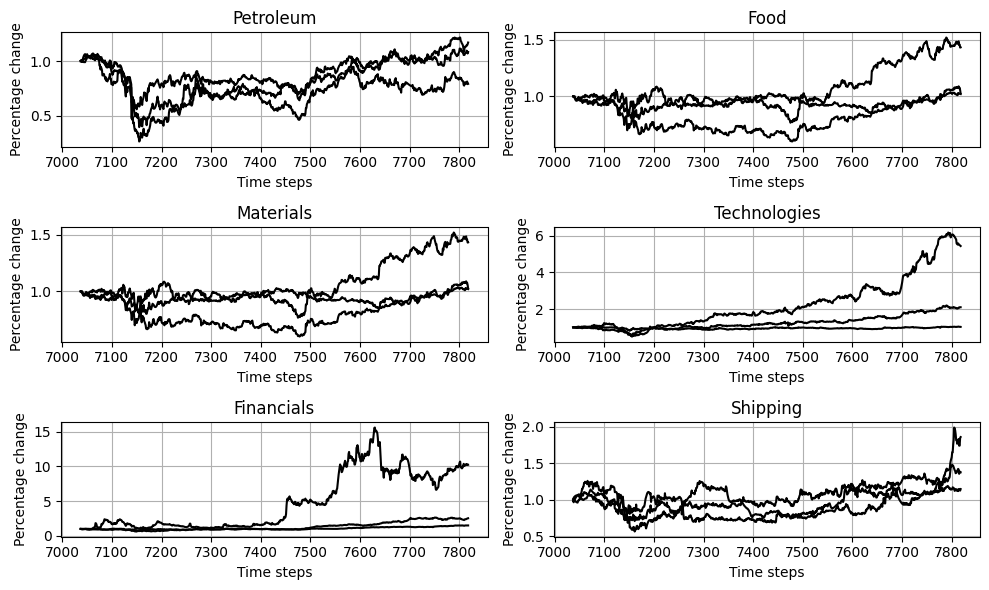

In [3]:
def z_score(arr):
    answer = (arr-arr.mean()) / arr.std()
    return answer

sector_names = [["Petroleum", "Food"],["Materials", "Technologies"], ["Financials", "Shipping"]]
fig, ax = plt.subplots(3,2, figsize=(10,6))
for i in range(0,3,1):
    ax[i,0].plot((np.cumprod(test.iloc[:, i*3:(i+1)*3]+1)), color="black", alpha=1)
    ax[i,1].plot((np.cumprod(test.iloc[:, 3+i*6 : (i+1)*6]+1)), color="black", alpha=1)

    ax[i,0].set_title(sector_names[i][0])
    ax[i,1].set_title(sector_names[i][1])

    ax[i,0].set_xlabel("Time steps")
    ax[i,1].set_xlabel("Time steps")

    ax[i,0].set_ylabel("Percentage change")    
    ax[i,1].set_ylabel("Percentage change")
    
    ax[i,0].grid()
    ax[i,1].grid()
fig.tight_layout()


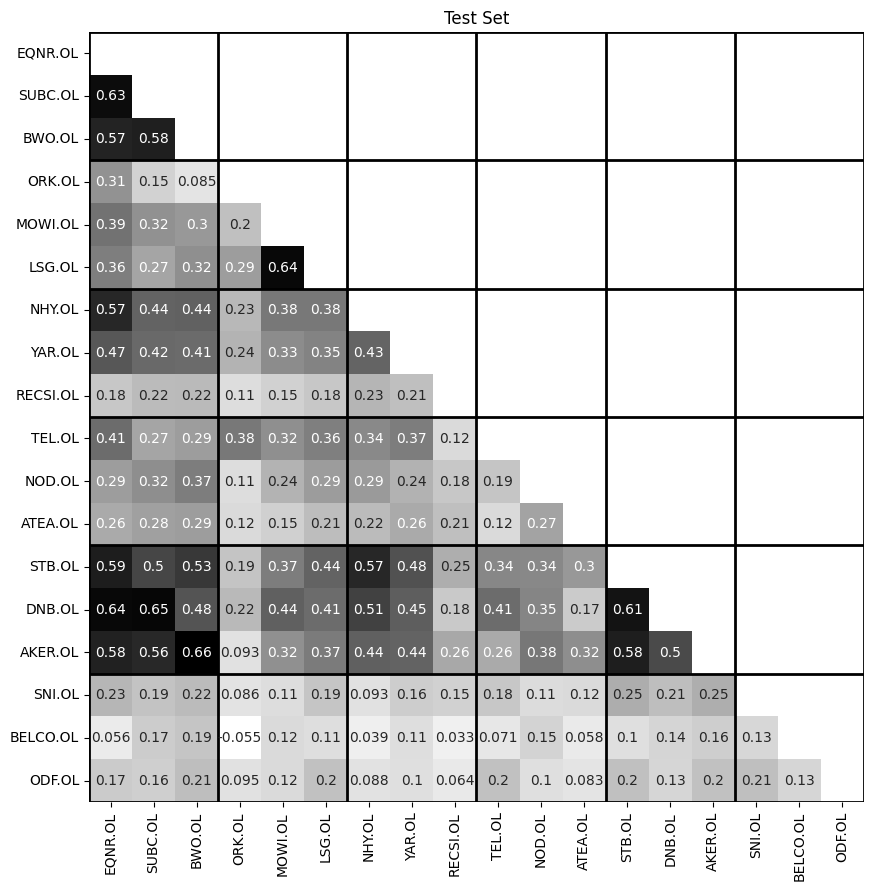

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
mask = np.triu(np.ones_like(train.corr(), dtype=bool))
sns.heatmap(test.corr(),
            mask=mask,
            cmap="Greys",
            annot=True, cbar=False)
for i in range(0, 19, 3):
    plt.axhline(i, color='black', linewidth=2)  # Horizontal line
for j in range(0, 19, 3):
    plt.axvline(j, color='black', linewidth=2)  # Vertical line
plt.title("Test Set")
plt.show()